# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import wget

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
if not os.path.exists("lut.py"):
 !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

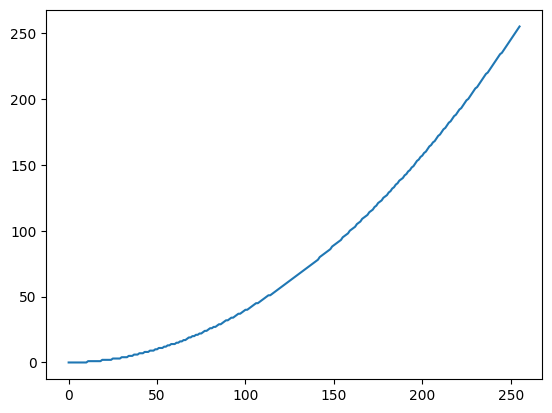

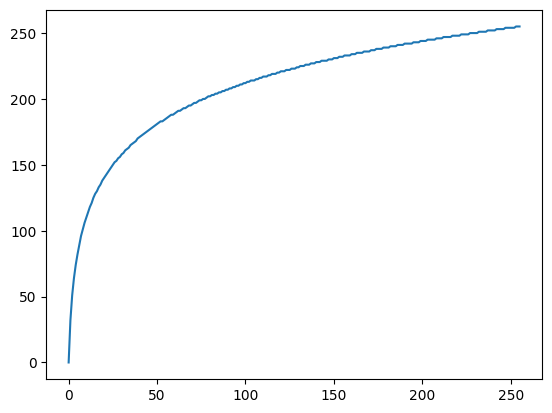

In [3]:
plt.plot(lut.kwadratowa)
plt.show()

plt.plot(lut.log)
plt.show()


Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [4]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp


Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

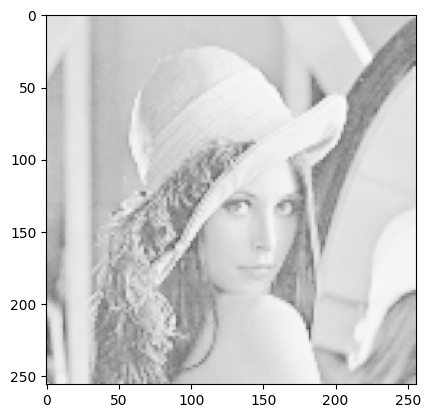

In [5]:
img = cv2.imread("lena.bmp")
img_lut = cv2.LUT(img, lut.log)

plt.imshow(img_lut)
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(img, matrix_tranformation):
    img_lut = cv2.LUT(img, matrix_tranformation)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.set_title('Wykres przekodowania')
    ax1.plot(matrix_tranformation)
    ax2.set_title('Obraz oryginalny')
    ax2.imshow(img)
    ax2.set_aspect('equal')
    ax3.set_title('Obraz przekształcony')
    ax3.imshow(img_lut)
    ax3.set_aspect('equal')
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

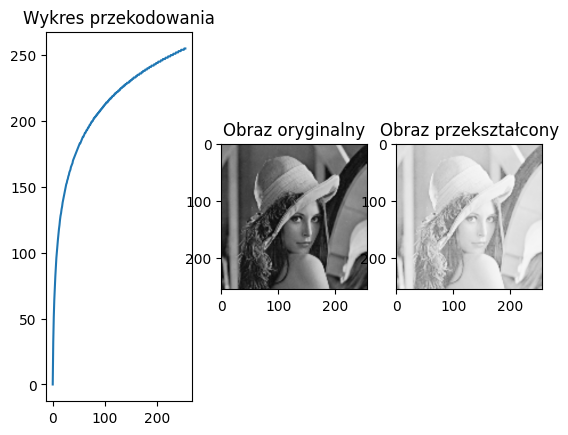

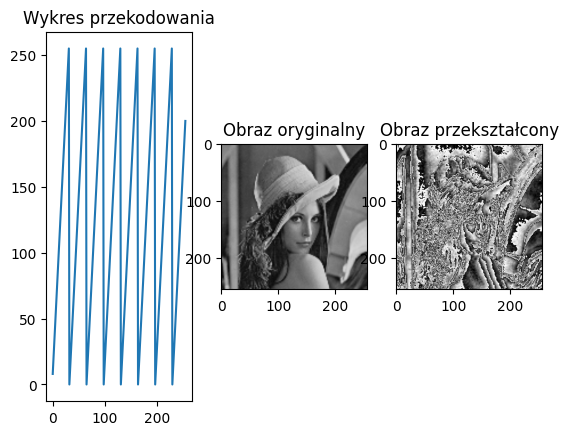

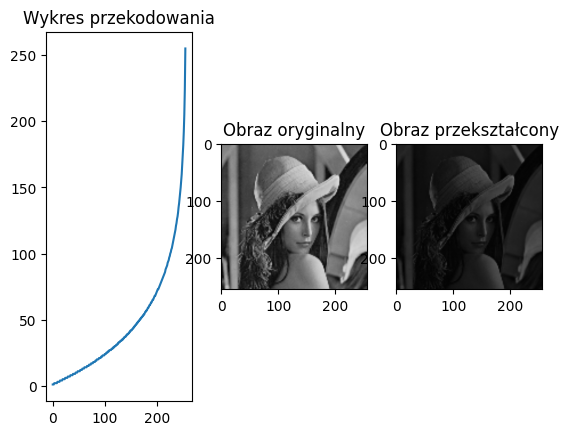

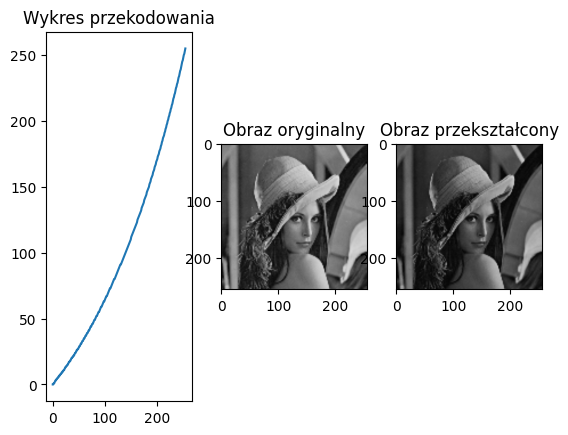

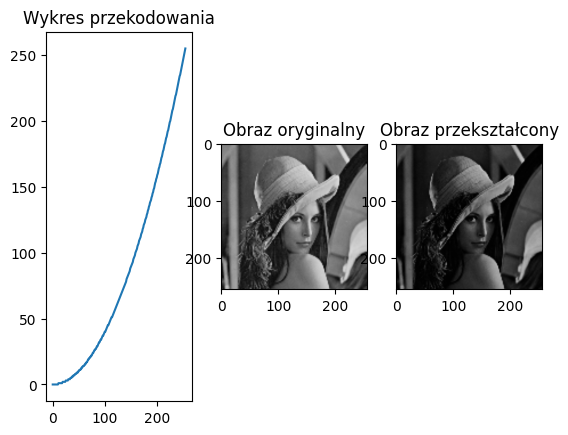

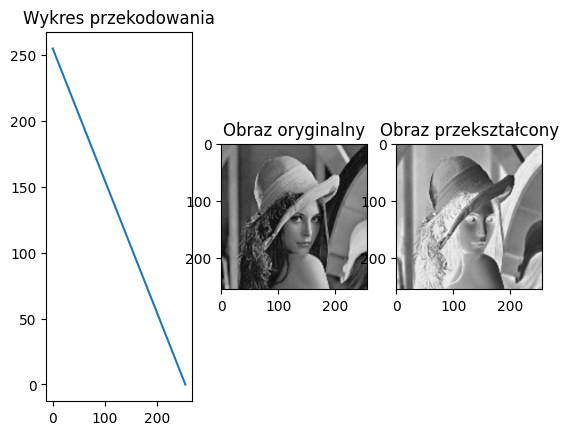

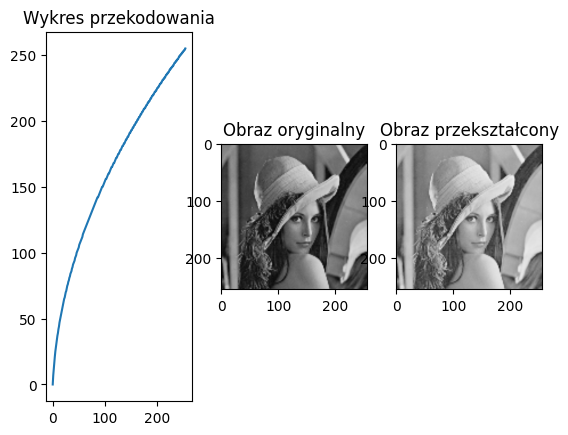

In [7]:
img = cv2.imread('lena.bmp')

l = [lut.log, lut.pila, lut.odwlog, lut.wykladnicza, lut.kwadratowa, lut.odwrotna, lut.pierwiastkowa]

for i in l:
    LUT(img, i)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

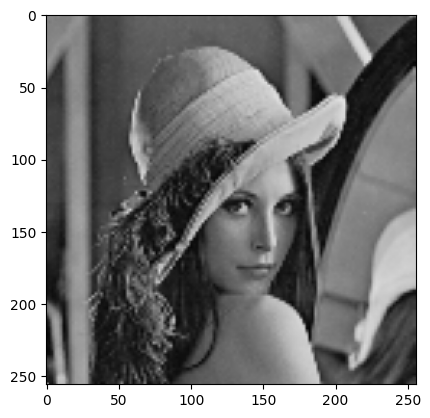

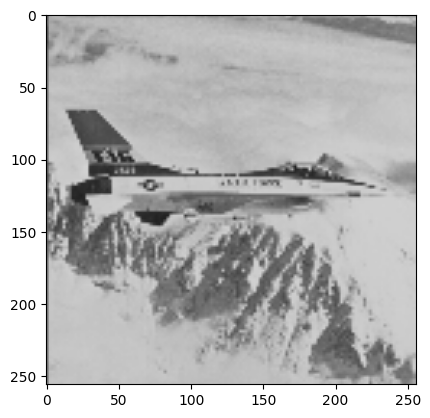

In [8]:
img_lena = cv2.imread('lena.bmp')
img_jet = cv2.imread('jet.bmp')

plt.imshow(img_lena)
plt.show()

plt.imshow(img_jet)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

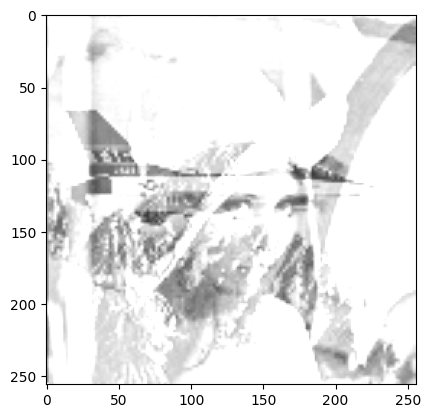

In [9]:
img_add = cv2.add(img_lena, img_jet)

plt.imshow(img_add)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

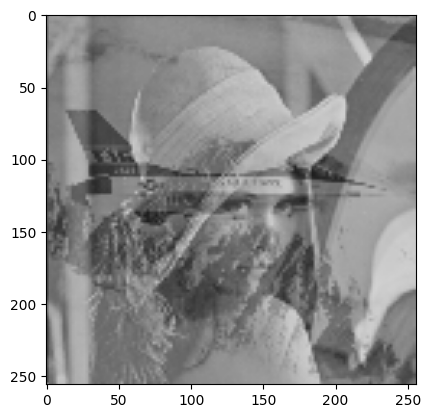

In [10]:
img_add = cv2.add(img_lena.astype('uint16'), img_jet.astype('uint16'))
img_add = img_add // 2
img_add.astype(np.uint8)

plt.imshow(img_add)
plt.show()

# Nie wynik nie jest satysfakcjonujący gdyż wynik operacji wychodzi poza zakres uint8 wiec potrzebujemy szerszego zakresu danaych w tym przypadku uint16

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

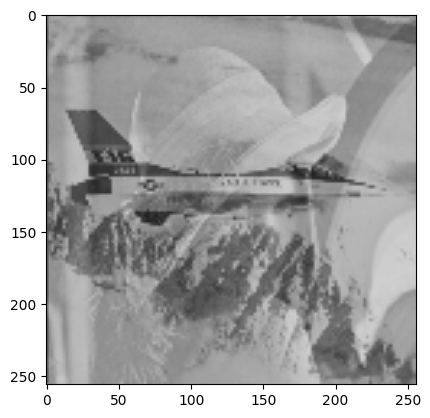

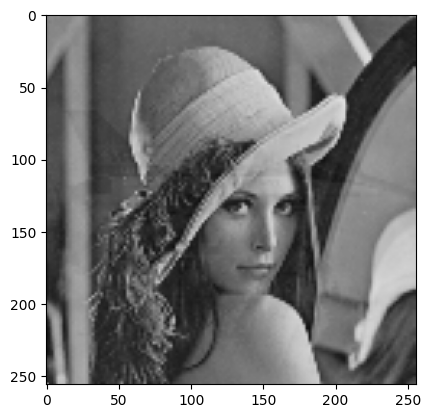

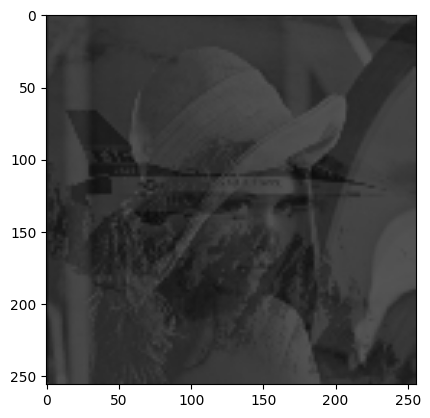

In [11]:
combination_1 = cv2.addWeighted(img_lena, 0.3, img_jet, 0.7, 0)
combination_2 = cv2.addWeighted(img_lena, 0.9, img_jet, 0.1, 0.5)
combination_3 = cv2.addWeighted(img_lena, 0.2, img_jet, 0.2, 1)

plt.imshow(combination_1)
plt.show()

plt.imshow(combination_2)
plt.show()

plt.imshow(combination_3)
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

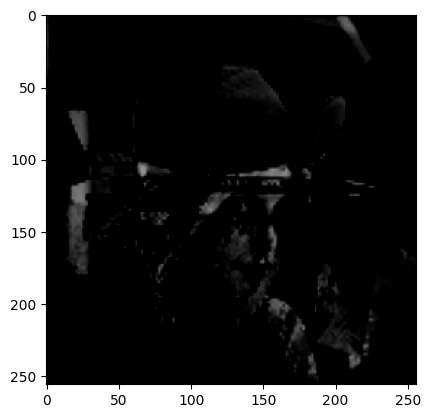

In [12]:
img_sub = cv2.subtract(img_lena, img_jet)

plt.imshow(img_sub)
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

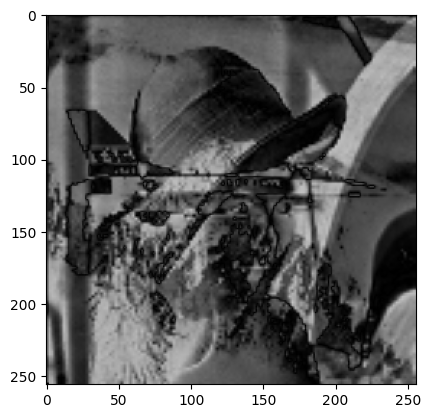

In [13]:
img_sub = cv2.subtract(img_lena.astype('int16'), img_jet.astype('int16'))

img_sub = np.abs(img_sub)

plt.imshow(img_sub)
plt.show()

# Nie wynik nie jest satysfakcjonujący gdyż podczas odejmowania podobnie jak przy dodawaniu możemy wyjść poza zakres uint8 przez co obraz wyświetla dziwne wyniki.
# Rozwiązaniem tego problemu jest zastosowanie int16 

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

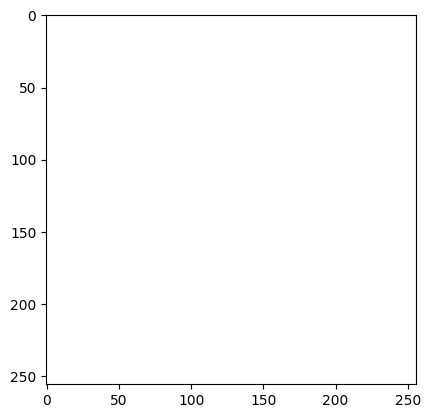

In [14]:
img_multiply = cv2.multiply(img_lena, img_jet)

plt.imshow(img_multiply)
plt.show()

# Mnożąc wychodzimy poza zakres wartości przez co uzyskujemy biały kolor

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

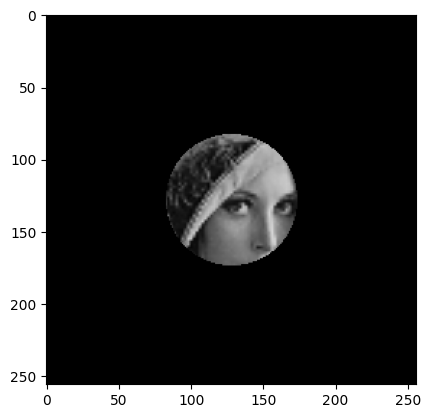

In [15]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

mask = cv2.imread('kolo.bmp')
img_bmp = cv2.multiply(img_lena, mask.astype('bool').astype('uint8'))

plt.imshow(img_bmp)
plt.show()


### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

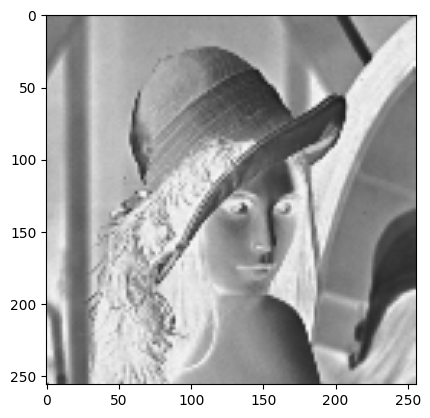

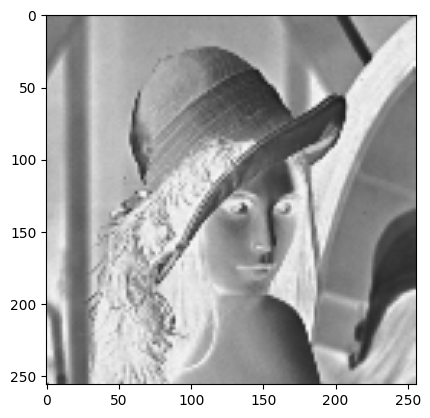

In [16]:
img_negative = cv2.bitwise_not(img_lena)
img_negative_2 = cv2.LUT(img_lena, lut.odwrotna)

plt.imshow(img_negative)
plt.show()

plt.imshow(img_negative_2)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

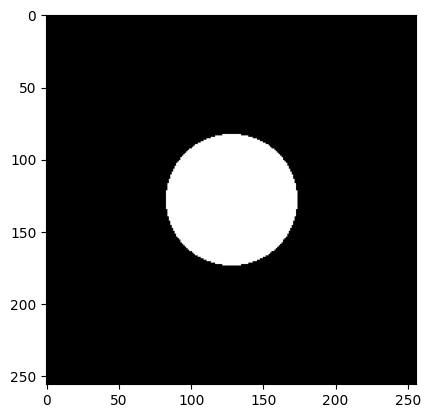

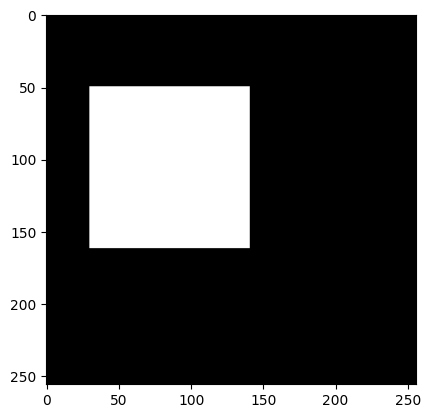

In [17]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

img_kolo = cv2.imread('kolo.bmp')
img_kwadrat = cv2.imread('kwadrat.bmp')

plt.imshow(img_kolo)
plt.show()

plt.imshow(img_kwadrat)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

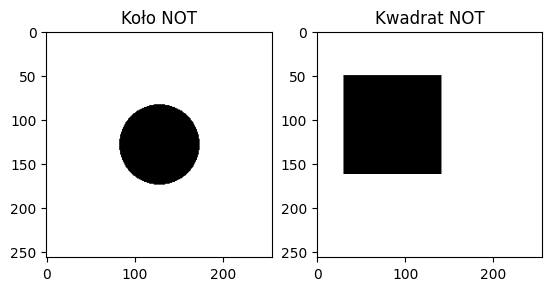

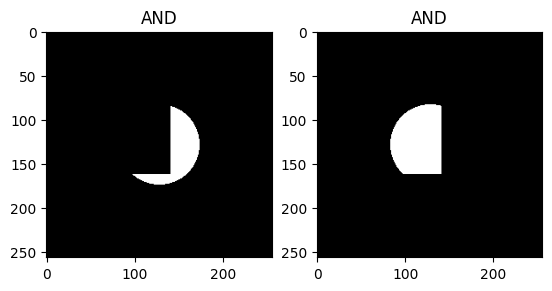

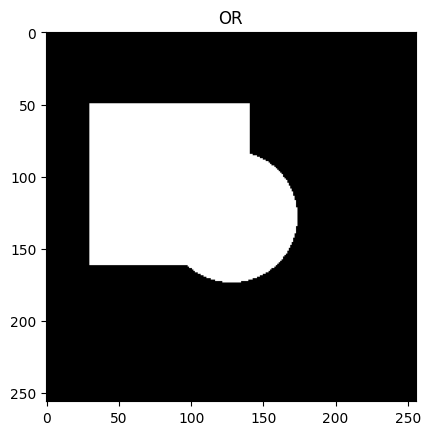

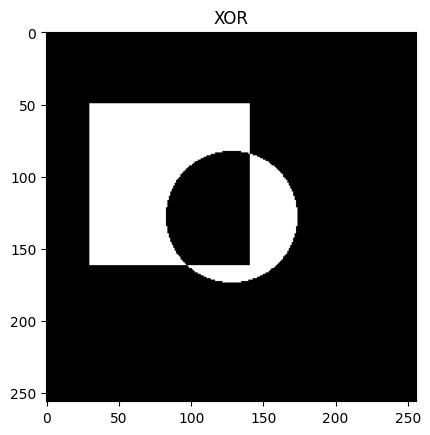

In [18]:
img_not_kolo = cv2.bitwise_not(img_kolo)
img_not_kwadrat = cv2.bitwise_not(img_kwadrat)

img_and_kolo = cv2.bitwise_and(img_kolo, img_not_kwadrat)
img_and_kwadrat = cv2.bitwise_and(img_kwadrat, img_kolo)

img_or = cv2.bitwise_or(img_kolo, img_kwadrat)

img_xor = cv2.bitwise_xor(img_kolo, img_kwadrat)


f, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Koło NOT')
ax1.imshow(img_not_kolo)
ax2.set_title('Kwadrat NOT')
ax2.imshow(img_not_kwadrat)
plt.show()

f, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('AND')
ax1.imshow(img_and_kolo)
ax2.set_title('AND')
ax2.imshow(img_and_kwadrat)
plt.show()

plt.imshow(img_or)
plt.title('OR')
plt.show()

plt.imshow(img_xor)
plt.title('XOR')
plt.show()